Brief illustration of use of simple methods to downscale daily UK national average 2m temperature, 10m wind speed, and surface shortwave irradiation, to hourly fields.
Trained and tested on ERA5 data from 1979-2016 and 2018-2020 respectively

In [18]:
import wind_downscaling
import solar_downscaling
import Temperature_downscaling
import numpy as np
import eval_case_study_function2

In [19]:
# Train on ERA5 1979 - 2016 hourly temperature
field = 'T2m'
t2m_seasonal = Temperature_downscaling.training()

Note: training will load a file called 'UK_mean_timeseries_t2m_1979_2016.nc', this file can be generated using functions in the file "iris_national_average.py" and hourly gridded ERA5 fields in a domain containing the UK.

In [20]:
# Load ERA5 hourly timeseries from 2018-2020 to validate against
case_no = '1'
nd = 7
obs = np.loadtxt('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_' + field + '.dat')
obs_date = np.load('/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_1/case_studies/Case_' + case_no + '_date.npy')

In [21]:
# Extract permitted daily information: Tmean, Tmax, Tmin
obs_days = np.reshape(np.array(obs), [nd, 24])
obs_dates = np.reshape(obs_date, [nd, 24])
              
obs_daily_mean = np.mean(obs_days, axis = 1)
obs_daily_max = np.max(obs_days, axis = 1)
obs_daily_min = np.min(obs_days, axis = 1)

In [22]:
# Simple temperature downscaling: use only daily mean data from target date
downscale_ts = Temperature_downscaling.downscaling_basic(t2m_seasonal, obs_daily_mean, obs_daily_min, obs_daily_max, nd, obs_dates)

In [23]:
# Adjustment of temperature downscaling based on daily mean data from days before and after target date
downscale_ts_improved = Temperature_downscaling.consecutive_day_matching(downscale_ts.copy(), obs_daily_mean, obs_daily_min, nd)

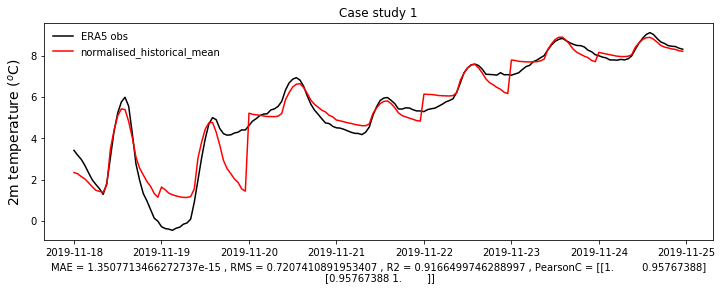

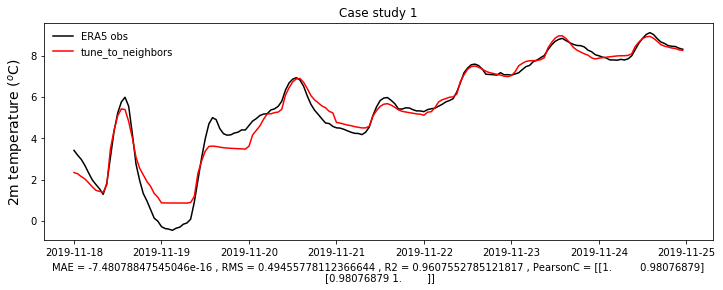

[-7.48078847545046e-16,
 0.49455778112366644,
 0.9607552785121817,
 array([[1.        , 0.98076879],
        [0.98076879, 1.        ]])]

In [24]:
# Evaluate compared to hourly validation data
eval_case_study_function2.RMS_based_eval(np.reshape(downscale_ts, [nd*24]),'T2m','1','normalised_historical_mean')
eval_case_study_function2.RMS_based_eval(np.reshape(downscale_ts_improved, [nd*24]),'T2m','1','tune_to_neighbors')

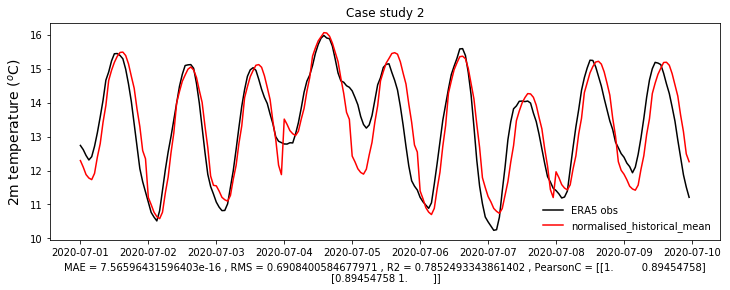

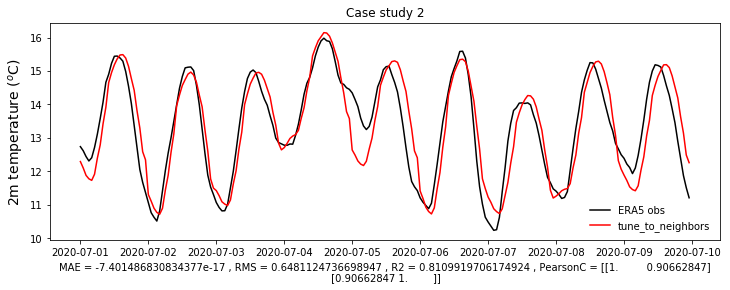

[-7.401486830834377e-17,
 0.6481124736698947,
 0.8109919706174924,
 array([[1.        , 0.90662847],
        [0.90662847, 1.        ]])]

In [27]:
# Test case 2
downscale_ts, downscale_ts_improved = Temperature_downscaling.test_case('2', 9, t2m_seasonal)
eval_case_study_function2.RMS_based_eval(downscale_ts,'T2m','2','normalised_historical_mean')
eval_case_study_function2.RMS_based_eval(downscale_ts_improved,'T2m','2','tune_to_neighbors')

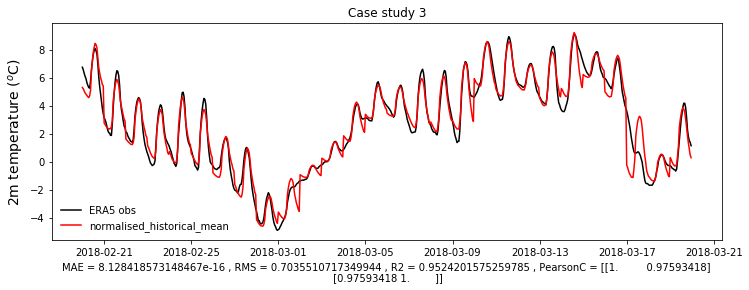

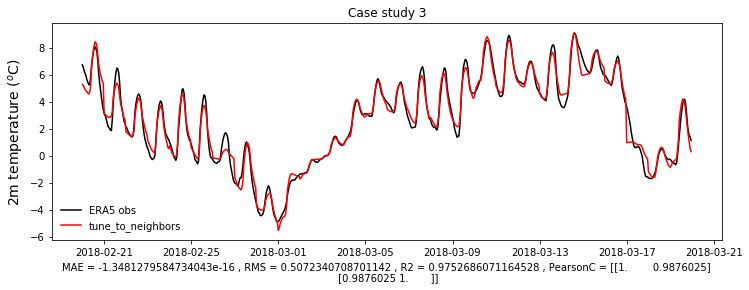

[-1.3481279584734043e-16,
 0.5072340708701142,
 0.9752686071164528,
 array([[1.       , 0.9876025],
        [0.9876025, 1.       ]])]

In [28]:
# Test case 3
downscale_ts, downscale_ts_improved = Temperature_downscaling.test_case('3', 28, t2m_seasonal)
eval_case_study_function2.RMS_based_eval(downscale_ts,'T2m','3','normalised_historical_mean')
eval_case_study_function2.RMS_based_eval(downscale_ts_improved,'T2m','3','tune_to_neighbors')

/opt/jaspy/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1725: UnknownCellMethodWarning: NetCDF variable 'ssrd' contains unknown cell method 'nanmean'
  warnings.warn(message=msg, category=UnknownCellMethodWarning)
/opt/jaspy/lib/python3.7/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'hour_of_day'.
  warnings.warn(msg.format(self.name()))


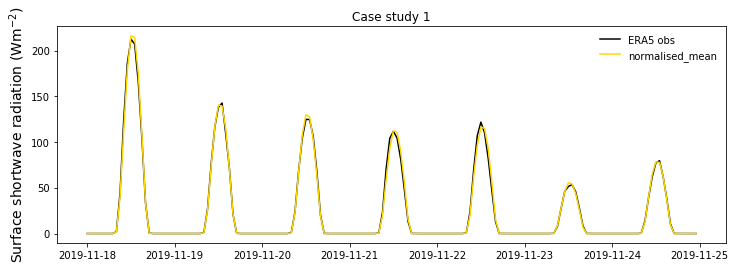

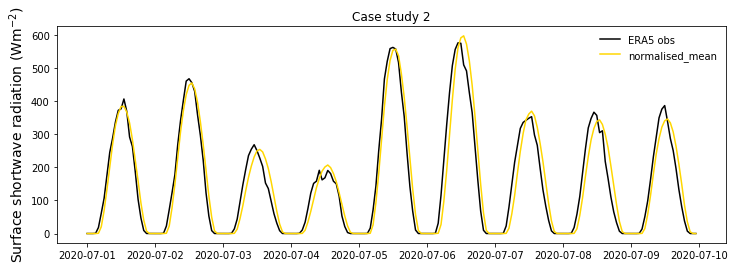

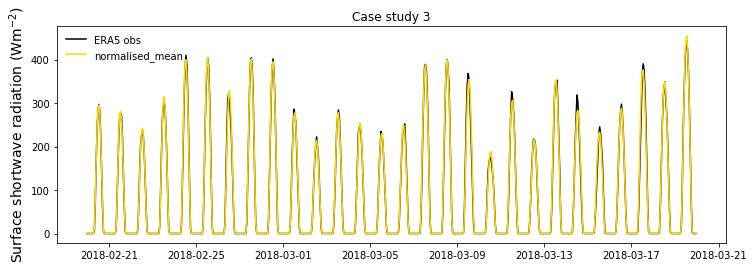

In [29]:
# Same for surface shortwave
solar_downscaling.main()

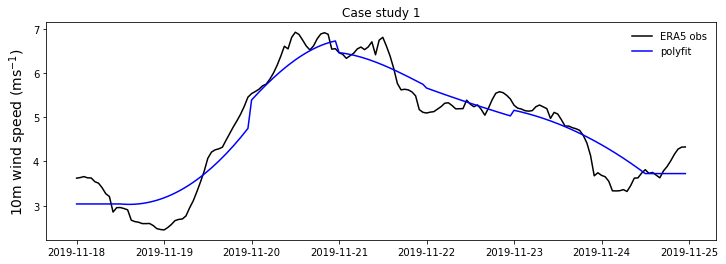

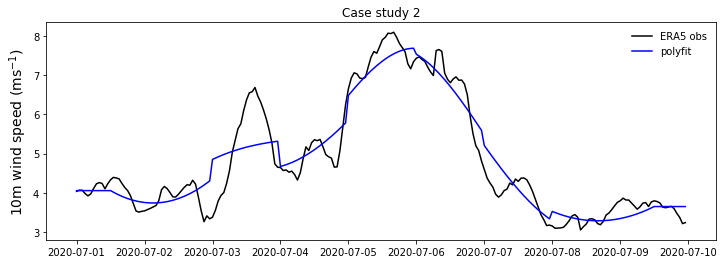

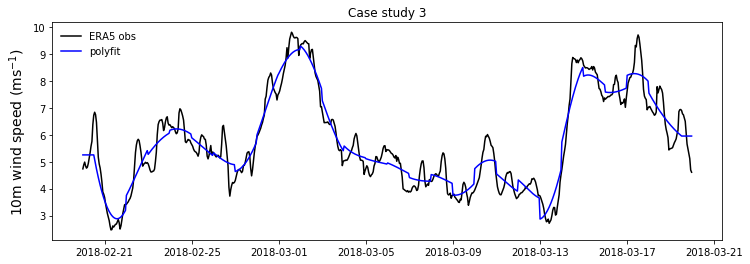

In [30]:
# Same for wind - doesn't use training
wind_downscaling.main()